Neden Doğrusal Regresyon Değil?

Neden Polinomsal Regresyon?

y = β0​+β1​x¹                  -----> Doğrusal Regresyon = 1.Dereceden Polinom Regresyonu       


y = β0​+β1​x¹+β2​x²                -----> 2.Dereceden Polinom Regresyonu     
y = β0​+β1​x¹+β2​x²+β3​x³           -----> 3.Dereceden Polinom Regresyonu       
y = β0​+β1​x¹+β2​x²+β3​x³+⋯+βnxⁿ   -----> n.Dereceden Polinom Regresyonu         

![hepsi 1.jpg](<attachment:hepsi 1.jpg>)
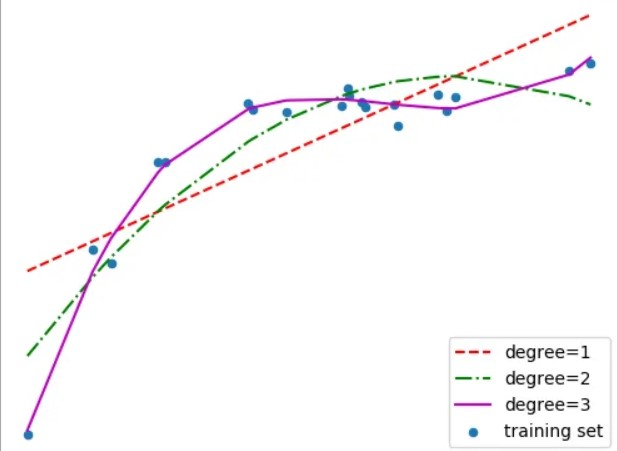

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [14]:
# Veriyi yüklüyoruz.
df = pd.read_csv('C:/Users/HP/Desktop/veri b projesi yorumsuz halleri/salary data.csv')

# Verinin ilk birkaç satırını inceliyoruz.
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
3,38.0,Male,PhD,Senior Scientist,10.0,110000.0
4,29.0,Male,Master's,Software Developer,3.0,75000.0


In [16]:
df.isnull().sum() # Eksik veri var mı kontrol ediyoruz.

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [15]:
df.info()  #Veri setinin özetini görüyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4217 non-null   float64
 1   Gender               4217 non-null   object 
 2   Education Level      4217 non-null   object 
 3   Job Title            4217 non-null   object 
 4   Years of Experience  4217 non-null   float64
 5   Salary               4217 non-null   float64
dtypes: float64(3), object(3)
memory usage: 197.8+ KB


In [17]:
'''# Kategorik verileri encode et
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])'''

label_encoder = LabelEncoder()
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

df = pd.get_dummies(df, columns=['Gender', 'Education Level'], drop_first=True)

# Girdi ve hedef değişkenleri belirliyoruz
X = df.drop(columns=['Salary'])
y = df['Salary']

# Eğitim ve test setlerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Polinom derecesini belirliyoruz.
degree = 3
poly = PolynomialFeatures(degree=degree)

# Eğitim ve test setine polinomsal dönüşüm uyguluyoruz.
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [19]:
# Modeli oluşturuyoruz.
model = LinearRegression()

# Polinomsal özelliklere sahip eğitim verisi ile modeli eğitiyoruz.
model.fit(X_train_poly, y_train)

# Tahmin yapıldı.
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [20]:
# Eğitim seti performansı değerlendirmesi;
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Test seti performansı değerlendirmesi;
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Train MSE: 187596594.7498514
Test MSE: 259722363.97158617
Train RMSE: 13696.590625036999
Test RMSE: 16115.9040693219
Train R² Score: 0.9256822136538381
Test R² Score: 0.8928559084402915


Polinom derecesi 2;       
Train MSE: 253226783.7887448  
Test MSE: 305873640.08764565   
Train RMSE: 15913.101011077157   
Test RMSE: 17489.24355390037    
Train R² Score: 0.8996823261113455   
Test R² Score: 0.8738169759503753    
   

Ridge Train RMSE: 17981.90294957594     
Ridge Test RMSE: 18423.717973666764     


4 e çıkartıldığı zaman sonuç;        
Train RMSE: 11481.053669841856   
Test RMSE: 155884.08974024878   
Train R² Score: 0.9477806684048568    
Test R² Score: -9.024494051440621    
    

Ridge Train RMSE: 11751.31477560657  
Ridge Test RMSE: 20379.96733051989   
  
  


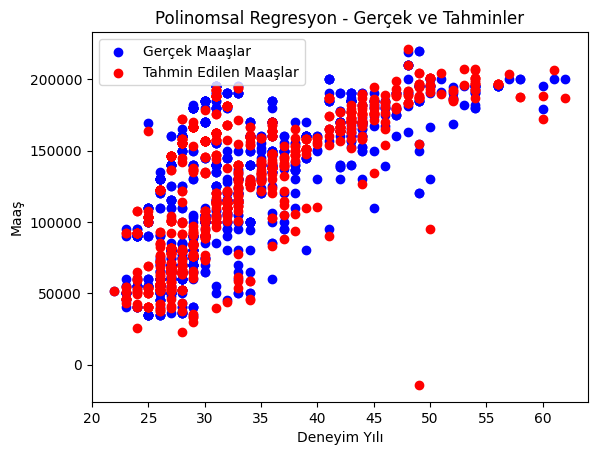

In [21]:
# Gerçek ve tahmin edilen maaşları karşılaştırıyoruz. (Tek bir değişken için örnek.)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Gerçek Maaşlar')
plt.scatter(X_test.iloc[:, 0], y_test_pred, color='red', label='Tahmin Edilen Maaşlar')
plt.title('Polinomsal Regresyon - Gerçek ve Tahminler')
plt.xlabel('Deneyim Yılı')
plt.ylabel('Maaş')
plt.legend()
plt.show()


In [22]:
from sklearn.linear_model import Ridge

# Ridge Regresyon ile polinomsal regresyon uyguluyoruz.
ridge_model = Ridge(alpha=1) #Model Oluşturuyoruz.
ridge_model.fit(X_train_poly, y_train) #Modeli eğitiyoruz.

# Performans değerlendirme yapıyoruz.
y_train_ridge_pred = ridge_model.predict(X_train_poly)
y_test_ridge_pred = ridge_model.predict(X_test_poly)

train_ridge_mse = mean_squared_error(y_train, y_train_ridge_pred)
test_ridge_mse = mean_squared_error(y_test, y_test_ridge_pred)

print(f"Ridge Train RMSE: {np.sqrt(train_ridge_mse)}")
print(f"Ridge Test RMSE: {np.sqrt(test_ridge_mse)}")


Ridge Train RMSE: 13840.871562553033
Ridge Test RMSE: 15877.54006997111


Optimizasyon İçin:

1.Polinom Derecesini Düşürmek

2.Alpha Parametresini Optimizasyon

In [23]:
from sklearn.model_selection import GridSearchCV

# Farklı alpha değerleri için grid search uyguluyoruz.
alpha_values = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, param_grid=alpha_values, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"En iyi alpha değeri: {best_alpha}")

# En iyi model ile yeniden eğitiyoruz.
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_poly, y_train)

# Sonuçlar
y_train_ridge_pred = ridge_best.predict(X_train_poly)
y_test_ridge_pred = ridge_best.predict(X_test_poly)

train_ridge_mse = mean_squared_error(y_train, y_train_ridge_pred)
test_ridge_mse = mean_squared_error(y_test, y_test_ridge_pred)

print(f"En iyi model ile Ridge Train RMSE: {np.sqrt(train_ridge_mse)}")
print(f"En iyi model ile Ridge Test RMSE: {np.sqrt(test_ridge_mse)}")


En iyi alpha değeri: 100
En iyi model ile Ridge Train RMSE: 14022.348749694516
En iyi model ile Ridge Test RMSE: 15838.280612702627


3. Cross-Validation ile Değerlendirme

In [24]:
# Cross-validation ile modelin doğruluğunu kontrol ediyoruz.
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(ridge_best, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cross_val_scores)
print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Ortalama RMSE: {rmse_scores.mean()}")


Cross-Validation RMSE Scores: [13964.88795256 14869.39484538 15936.959861   15311.96404604
 14675.61123064]
Ortalama RMSE: 14951.76358712422
